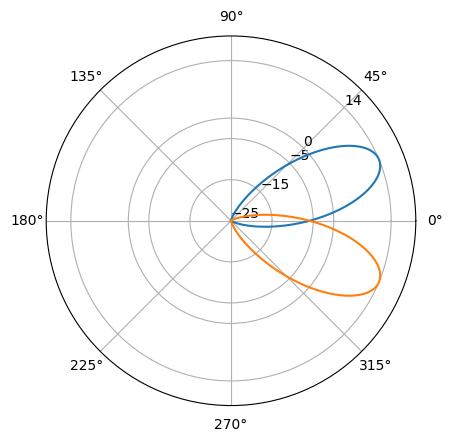

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from Model import Model
from BLEHardware import Transmitter, Receiver

def gain(theta, maxGain, falloff, offTheta):
  g = (maxGain+25) * np.power(np.cos(theta + offTheta),falloff)
  thetaOff = theta - offTheta
  return g-25, thetaOff

def FSPL(gi,dis,pow):
  return gi + pow - (20*np.log10(dis)+40.05-(-10))

def rudimentaryNoise(g):
  noise = np.vectorize(noiser)(g)
  return noise

def noiser(gi):
  rnd = np.random.default_rng()
  noise_floor = -90
  if (gi - noise_floor) > 0:
    return gi
  else:
    return gi + (rnd.random() * (noise_floor - gi))


fig = plt.figure()
ax = fig.add_subplot(projection="polar")

theta = np.arange(-(np.pi/2),np.pi/2,0.01)[1:]
max=14

g1, t1 = gain(theta,max,9,(-np.pi/16))
g2, t2 = gain(theta,max,9,(np.pi/16))

#theta = np.where(g >= 0, theta, theta + np.pi)

ax.set_rticks([-25,-15,-5,0,max])
ax.set_rlabel_position(45)
ax.set_rlim(-25,20)
ax.plot(t1,g1)
ax.plot(t2,g2)
plt.show()


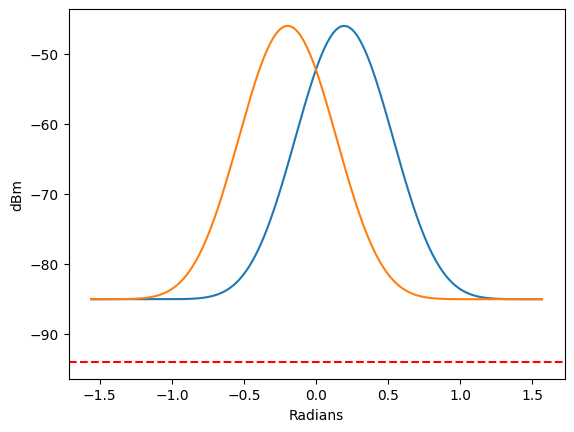

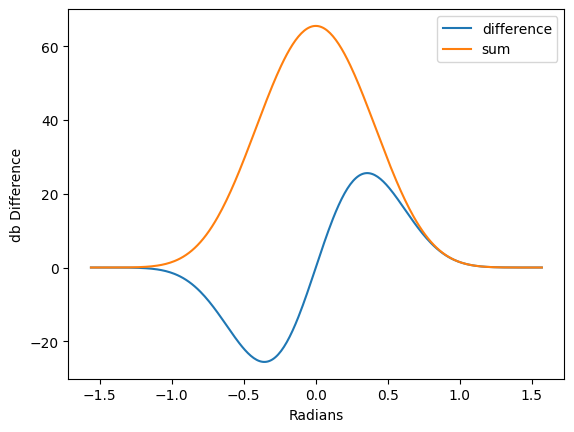

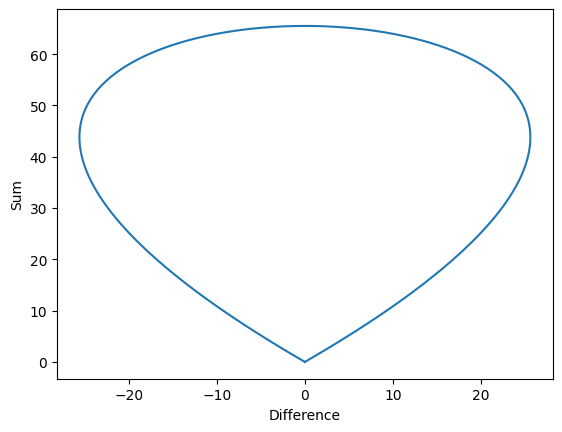

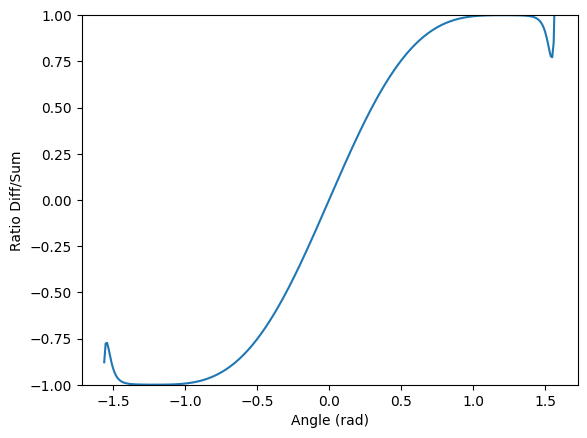

In [4]:
from basic_units import cos, degrees, radians
fig2 = plt.figure()
cx = fig2.add_subplot()

distance = 10 #meters

cx.set_xlabel("Radians")
cx.set_ylabel("dBm")
cx.axhline(y = -94, color = 'r', linestyle = '--') 

ng1 = FSPL(g1,distance,10)
ng2 = FSPL(g2,distance,10)
cx.plot(theta,ng1)
cx.plot(theta,ng2)

diff1 = ng1 - ng2
diff2 = ng2 - ng1
sum = (ng1 - np.min(ng1)) + (ng2 - np.min(ng2))

fig3 = plt.figure()
nx = fig3.add_subplot()
nx.set_xlabel("Radians")
nx.set_ylabel("db Difference")
nx.plot(theta,diff1, label='difference')
#nx.plot(theta,diff2)
nx.plot(theta, sum, label="sum")
nx.legend()

fig4 = plt.figure()
ex = fig4.add_subplot()
ex.set_xlabel("Difference")
ex.set_ylabel("Sum")
ex.plot(diff1, sum)

fig5 = plt.figure()
diff_sum_ratio = diff1 / sum
sx = fig5.add_subplot()
sx.set_xlabel("Angle (rad)")
sx.set_ylabel("Ratio Diff/Sum")
sx.set_ylim(-1,1)
sx.plot(theta, diff_sum_ratio)



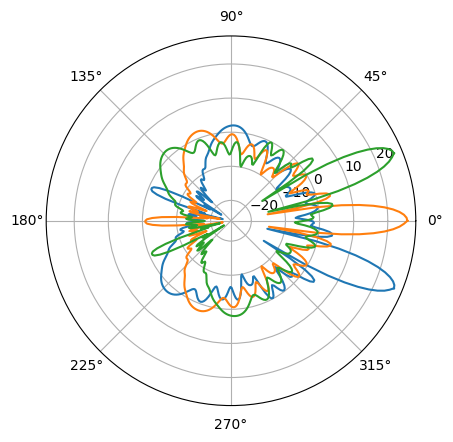

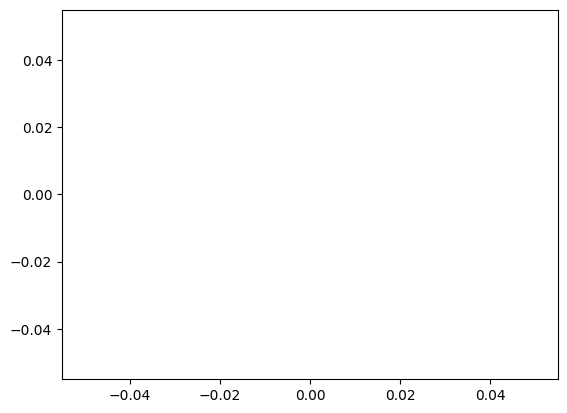

In [1]:
from Model import NewModel
from BLEHardware import Antenna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Model = NewModel(-100)
Model.plotTransmitters()
Model.plotRecievedSignal()


[3.1590459461097367, 3.1764992386296798, 3.193952531149623, 3.2114058236695664, 3.2288591161895095, 3.246312408709453, 3.263765701229396, 3.2812189937493397, 3.2986722862692828, 3.3161255787892263, 3.3335788713091694, 3.351032163829113, 3.368485456349056, 3.385938748868999, 3.4033920413889427, 3.420845333908886, 3.4382986264288293, 3.4557519189487724, 3.473205211468716, 3.490658503988659, 3.5081117965086026, 3.5255650890285457, 3.543018381548489, 3.5604716740684323, 3.5779249665883754, 3.595378259108319, 3.612831551628262, 3.6302848441482056, 3.6477381366681487, 3.6651914291880923, 3.6826447217080354, 3.7000980142279785, 3.717551306747922, 3.735004599267865, 3.7524578917878086, 3.7699111843077517, 3.7873644768276953, 3.8048177693476384, 3.822271061867582, 3.839724354387525, 3.857177646907468, 3.8746309394274117, 3.8920842319473548, 3.9095375244672983, 3.9269908169872414, 3.944444109507185, 3.961897402027128, 3.9793506945470716, 3.9968039870670147, 4.014257279586958, 4.031710572106901, 

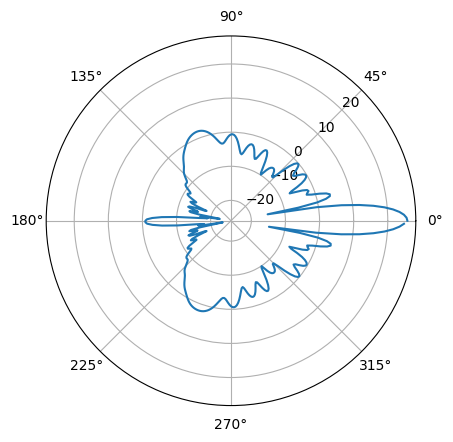

In [18]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from Model import Model
from BLEHardware import Transmitter, Receiver

wanted_keys = ('theta', 'magdB')
mat = scipy.io.loadmat('ExampleDishFarfieldAz.mat')
pqr = pd.Series(mat)
mat_dict = {key : pqr.to_dict()[key] for key in wanted_keys}

theta = []
deg = []
magdB = []
for i in range(0, len(mat_dict['theta'][0])):
    if mat_dict['theta'][0][i] < 0: 
        theta.append(np.deg2rad(mat_dict['theta'][0][i] + 360))
        deg.append(mat_dict['theta'][0][i]+360)
    else:
        theta.append(np.deg2rad(mat_dict['theta'][0][i]))
        deg.append(mat_dict['theta'][0][i])
    magdB.append(mat_dict['magdB'][i][0])

print(theta)
df = pd.DataFrame()
df["deg"] = deg
df["theta"] = theta
df["magdB"] = magdB

df = df.sort_values("deg")
print(df)

fig = plt.figure()
ax = fig.add_subplot(projection="polar")

ax.set_rlabel_position(45)
ax.plot(df["theta"],df["magdB"])
plt.show()
